# Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

Loading the dataset to analyse

In [2]:
task=pd.read_csv("c:/Users/saurav/desktop/taskdata.csv")
task.head(10)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.00,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.00,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.00,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.00,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.50,48.230769,1.692308,17.461538,25.769231,0.230769,0
5,412391,113.0,1,1.000000,14,0.0,0.0,12.692308,380.769231,0,350.00,799.153846,115.153846,166.307692,160.769231,0.153846,0
6,412662,1005.0,21,4.636364,11,0.0,0.0,1.000000,26.363636,0,0.00,119.727273,12.454545,46.000000,57.272727,0.181818,0
7,457000,262.0,29,3.250000,16,0.0,0.0,3.250000,68.750000,3,63.07,26.937500,3.250000,18.625000,17.062500,0.062500,0
8,490356,1005.0,3,1.400000,5,0.0,0.0,0.000000,0.000000,5,0.00,2.500000,0.500000,1.000000,1.750000,0.000000,1
9,491551,1017.0,1,1.000000,2,0.0,0.0,0.000000,0.000000,0,0.00,74.500000,10.500000,4.500000,9.500000,0.000000,1


In [9]:
task["target"].value_counts()

0    3952
1     455
Name: target, dtype: int64

In [4]:
#Lets us check for datatypes of given data
task.dtypes

user_id                    int64
account_id               float64
max_return_days            int64
average_return_days      float64
customer_since_months      int64
total_revenue            float64
average_revenue          float64
avg_vas_count            float64
avg_used_vas_value       float64
business_type              int64
avg_wallet_bonus         float64
avg_active_ads           float64
avg_new_ads              float64
avg_email_replies        float64
avg_call_replies         float64
avg_sms_replies          float64
target                     int64
dtype: object

In [5]:
#Lets us check for missing values in given data
task.isnull().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

In [ ]:
Let us check correlation between attributes using heatmap method

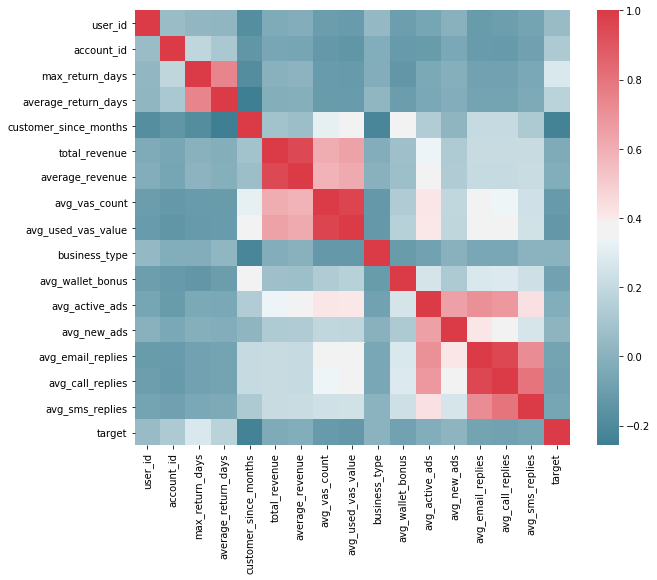

In [12]:
plt.subplots(figsize=(10, 8))
corr = task.corr()
sb.heatmap(corr, mask=np.zeros_like(corr), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True)

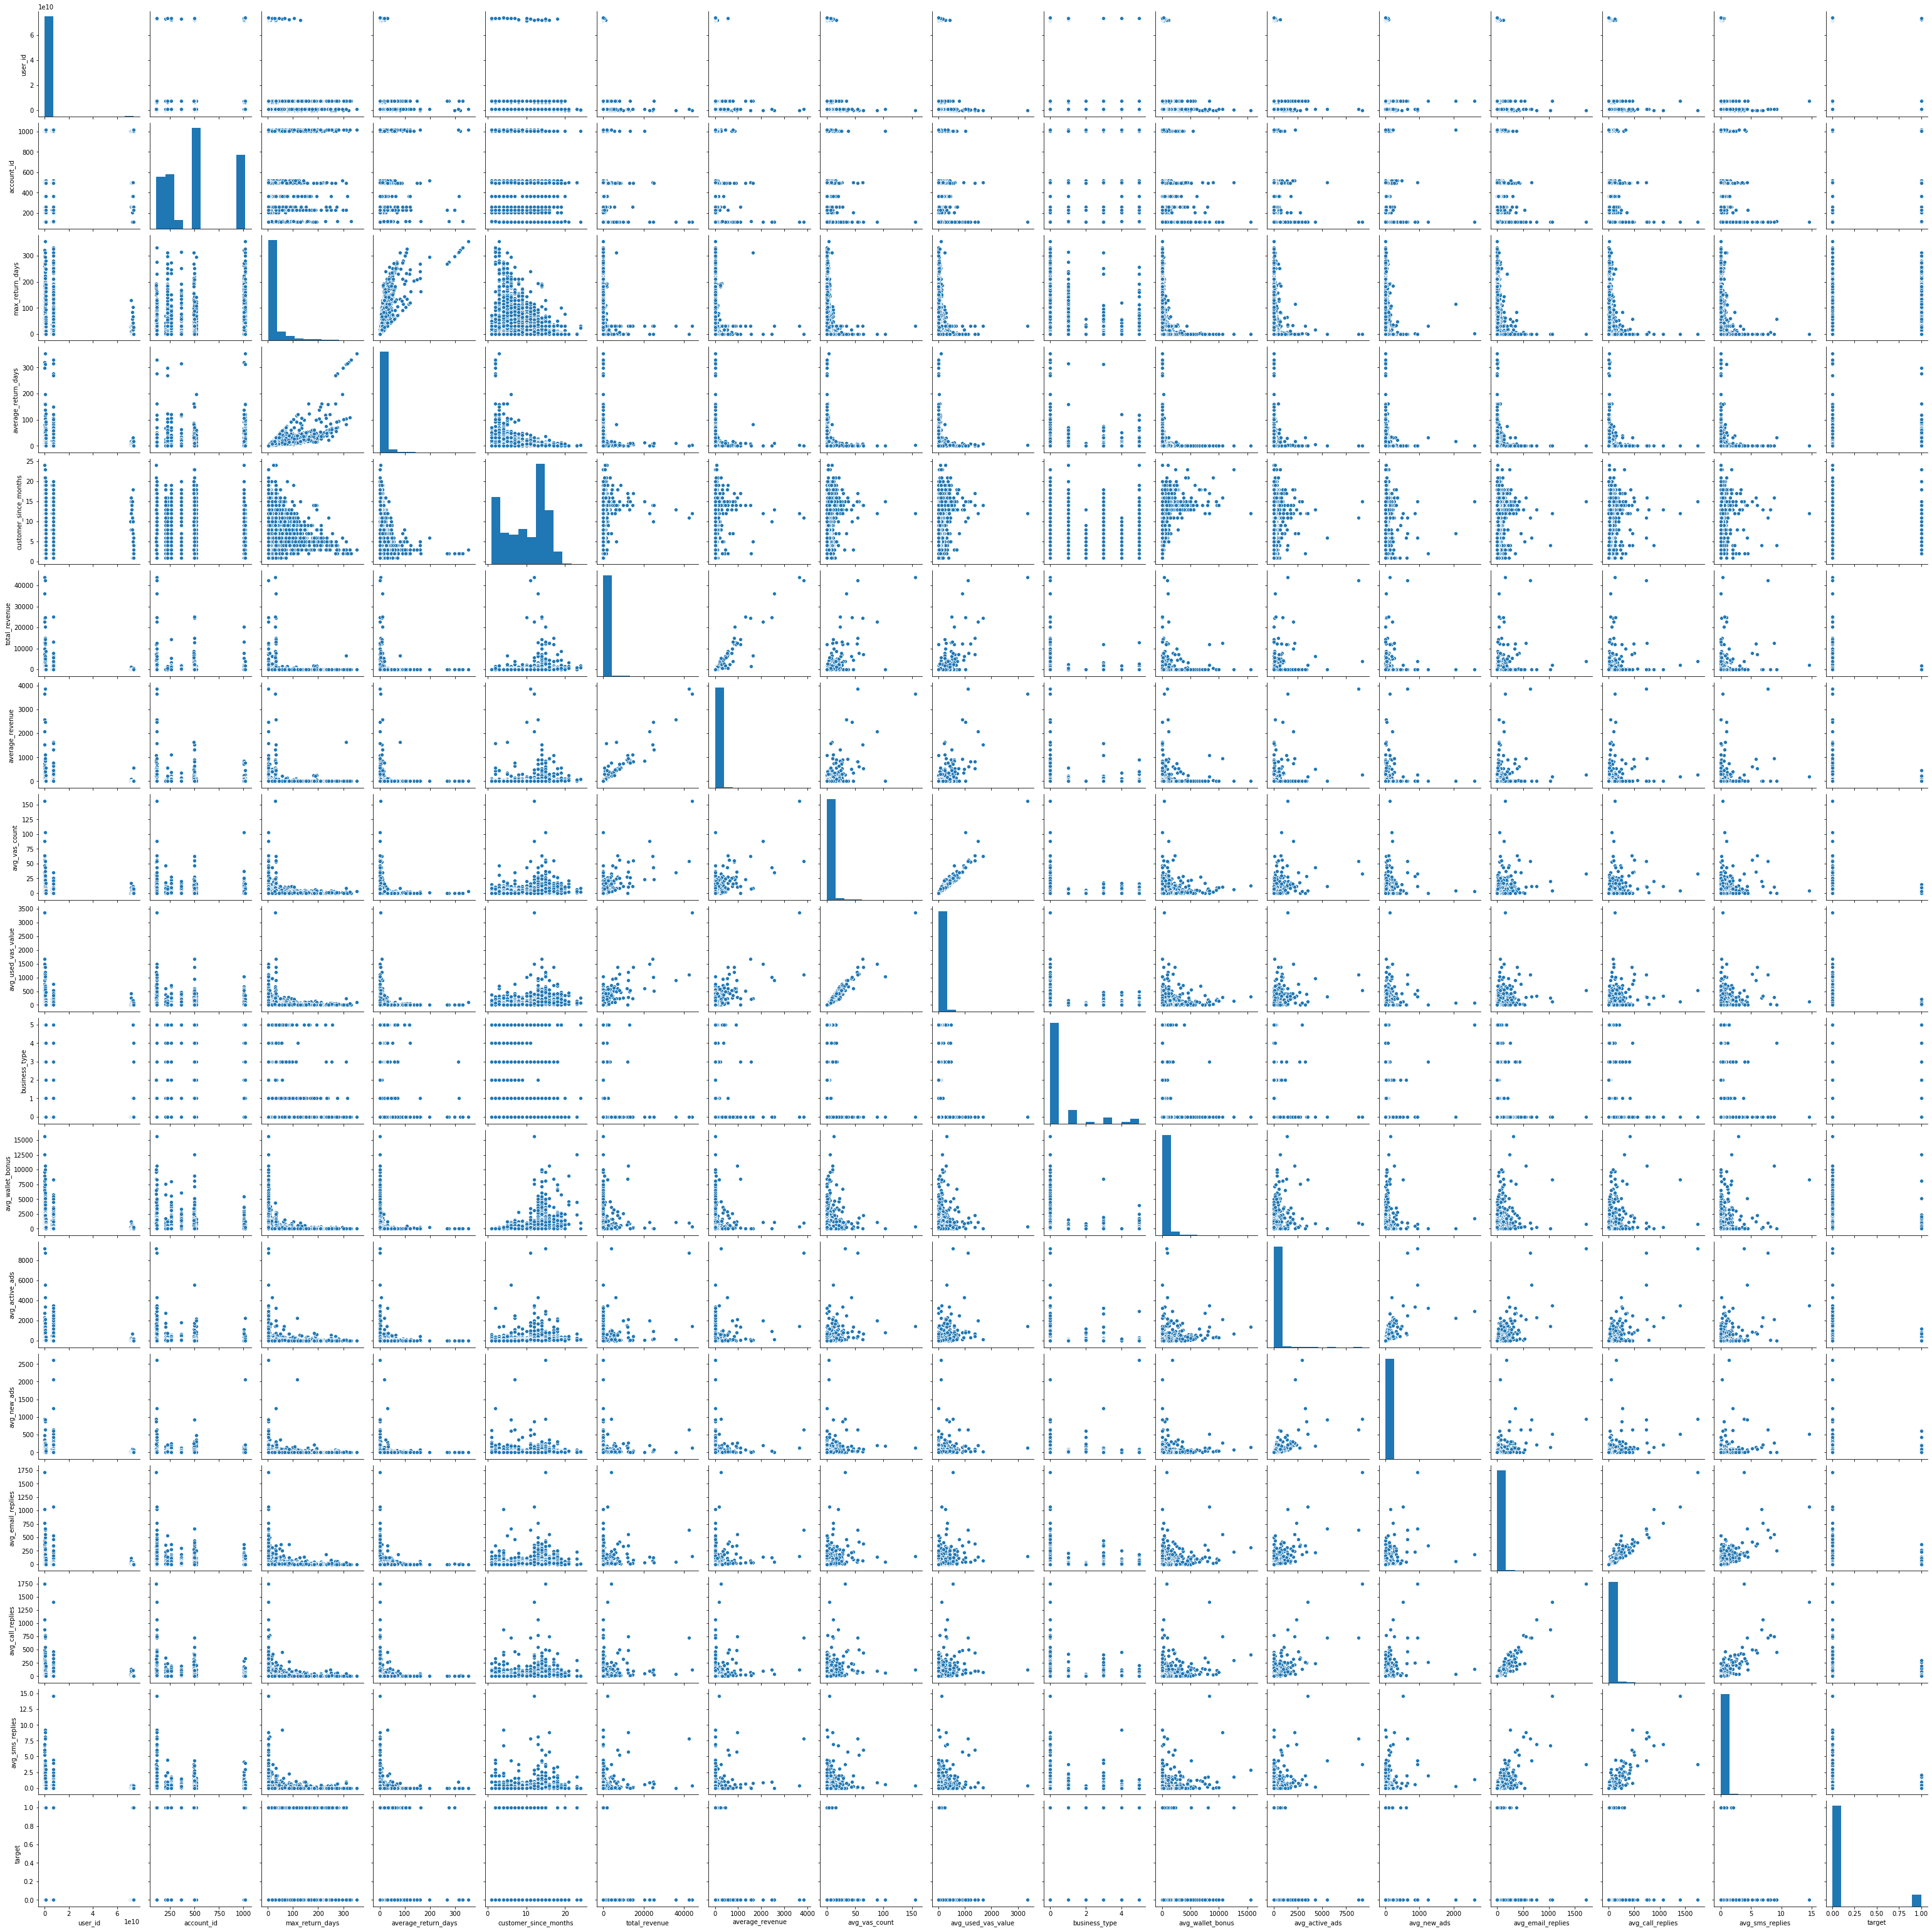

In [13]:
#Let us check for linear or non linear relationship
sns.pairplot(task)

In [14]:
numeric_data = task.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns

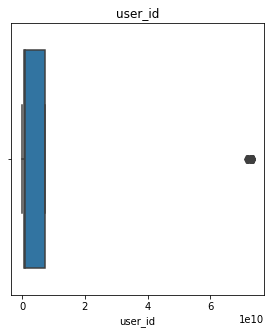

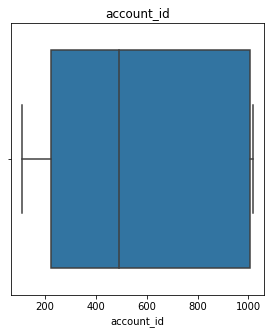

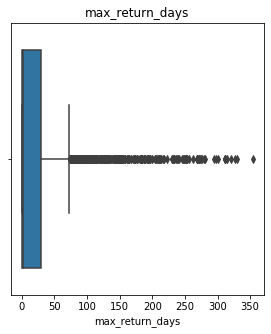

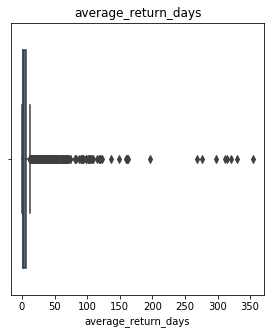

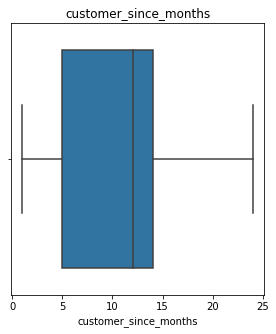

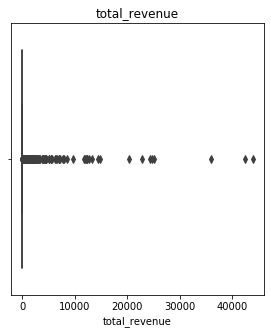

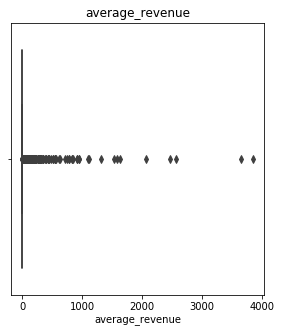

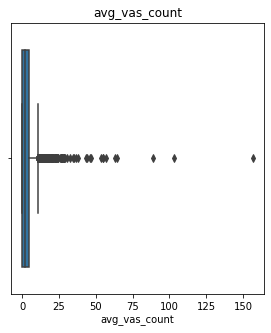

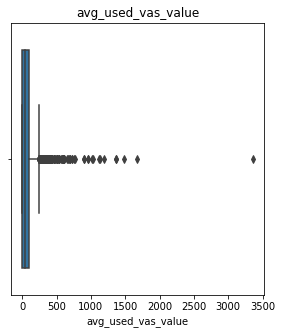

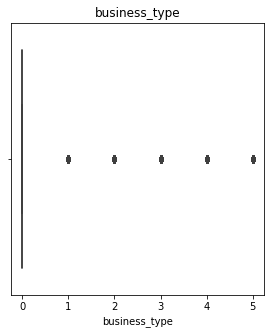

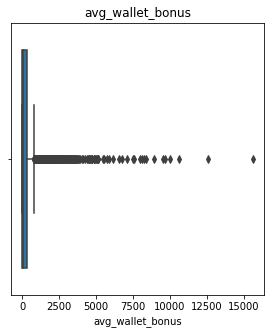

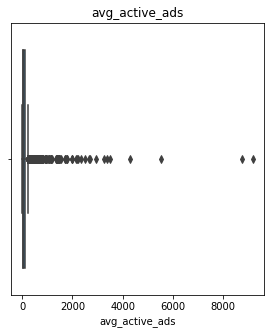

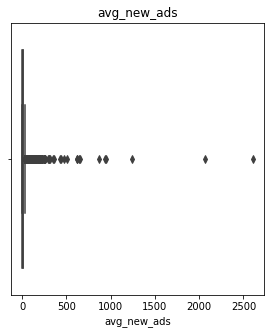

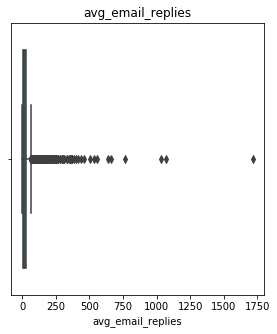

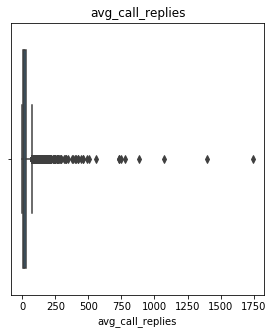

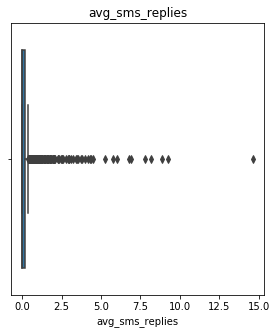

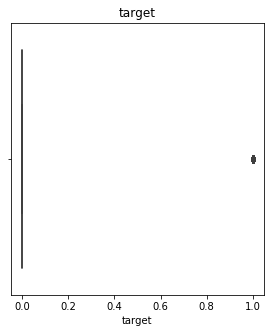

In [15]:
#To check for OUTLIERS let us draw boxplots
for column in numeric_col:
    plt.figure(figsize=(10,5))
    plt.subplot(122)
    sns.boxplot(task[column])
    plt.title(column)

As we can see business_type, total revenue  have large number of outliers , so it is better to drop these columns

In [16]:
#Let us drop these columns
task.drop(['account_id','business_type','total_revenue'],axis=1,inplace=True)

In [17]:
#let us check our dataset now
task.head(3)

,user_id,max_return_days,average_return_days,customer_since_months,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,8,1.500000,14,0.0,3.666667,66.666667,300.0,79.333333,15.25,32.416667,27.916667,0.25,0
1,410240,37,8.200000,10,0.0,4.900000,114.000000,0.0,232.100000,18.30,16.200000,13.800000,0.00,0
2,411764,9,1.533333,15,0.0,5.333333,106.666667,150.0,55.083333,3.75,20.250000,24.500000,0.00,0


# Divide the dataset in training and testing

In [29]:
#Last column is target variable and rest all is dependent variable
X= task.iloc[:,:-1]
Y = task.iloc[:,-1]

# Dividing the data into train and test subsets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


Since there are float variable also in the dependent variable so we need to standardise the data for dependent variable

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B = pd.DataFrame(ss.fit_transform(X))

In [31]:
X

,user_id,max_return_days,average_return_days,customer_since_months,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,410039,8,1.500000,14,0.00,3.666667,66.666667,300.0,79.333333,15.250000,32.416667,27.916667,0.250000
1,410240,37,8.200000,10,0.00,4.900000,114.000000,0.0,232.100000,18.300000,16.200000,13.800000,0.000000
2,411764,9,1.533333,15,0.00,5.333333,106.666667,150.0,55.083333,3.750000,20.250000,24.500000,0.000000
3,411985,1,1.000000,14,0.00,6.307692,176.153846,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000
4,412071,1,1.000000,18,0.00,5.846154,109.230769,41.5,48.230769,1.692308,17.461538,25.769231,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,73498690100,1,1.000000,4,0.00,0.000000,0.000000,0.0,4.666667,2.000000,9.666667,14.666667,0.333333
4403,73519239100,1,1.000000,2,0.00,0.000000,0.000000,0.0,153.000000,76.500000,9.000000,11.500000,0.000000
4404,73525763100,1,1.000000,2,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4405,73538605100,1,1.000000,2,551.19,7.000000,70.000000,0.0,17.000000,17.000000,10.000000,8.000000,0.000000


In [32]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
4402    0
4403    0
4404    0
4405    0
4406    0
Name: target, Length: 4407, dtype: int64

# Now apply machine learning Classification model 

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
# fitting the model
logmodel.fit(X_train, Y_train)
# predicting the values
pred1= logmodel.predict(X_train)

In [34]:
from sklearn.metrics import accuracy_score
pred=logmodel.predict(X_train)
accuracy_score(Y_train,pred)

0.9018439716312057

As we can see above 90 percent accuracy in logistic regression model

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       773
           1       0.73      0.17      0.28       109

    accuracy                           0.89       882
   macro avg       0.81      0.58      0.61       882
weighted avg       0.87      0.89      0.86       882

ROC_AUC_SCORE is 0.5826281495899451


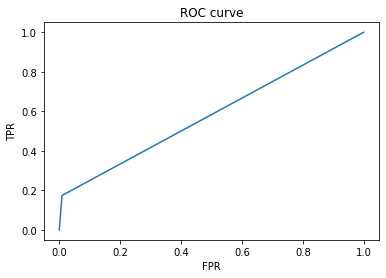

In [36]:
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, Y_train)
pred2 = model.predict(X_test)
auc = roc_auc_score(Y_test,pred2)
print('Classification Report:')
print(classification_report(Y_test,pred2))
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test,pred2)
print('ROC_AUC_SCORE is',roc_auc_score(Y_test, pred2))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Let us check for best 10 predictor for our target variable

In [38]:
# Selecting 8 number of features
#   selecting models
from sklearn.feature_selection import RFE
models = LogisticRegression()
#   using  rfe and selecting 10 features
rfe = RFE(models,10)
#   fitting the model
rfe = rfe.fit(X,Y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Logistic Regression model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)


Features  to be selected for Logistic Regression model are:
['user_id', 'customer_since_months', 'average_revenue', 'avg_vas_count', 'avg_used_vas_value', 'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads', 'avg_email_replies', 'avg_call_replies']
